## Problem 3: How many people live near shopping centers? (8 points)

In the last step of this analysis, use a *spatial join* to relate data from a population grid data set to the buffer layer created in *problem 2* to find out how many people live in all population grid cells that are **within** 1.5 km distance from each shopping centre.

Use the same population grid data set as during [lesson 3](https://autogis-site.readthedocs.io/en/latest/lessons/lesson-3/spatial-join.html) (load it directly from WFS, don’t forget to assign a CRS).


*Feel free to divide your solution into more codeblocks than prepared! Remember to add comments to your code :)*

### a) Load the population grid data set and the buffer geometries (2 points)

Use the same population grid data set as during [lesson 3](https://autogis-site.readthedocs.io/en/latest/lessons/lesson-3/spatial-join.html) (load it directly from WFS, don’t forget to assign a CRS). Load the data into a `GeoDataFrame` called `population_grid`.

(optional) If you want, discard unneeded columns and translate the remaining column names from Finnish to English.

In [13]:
import geopandas
import pyproj

shopping_centre_buffers = geopandas.read_file('/content/output.gpkg')
shopping_centre_buffers.head()

,geometry
0,"POLYGON ((25506098.602 6677662.109, 25506091.3..."
1,"POLYGON ((25498049.312 6672862.540, 25498042.0..."
2,"POLYGON ((25487054.265 6671954.969, 25487047.0..."
3,"POLYGON ((25491151.383 6678394.318, 25491144.1..."
4,"POLYGON ((25499601.692 6686561.206, 25499594.4..."


<Axes: >

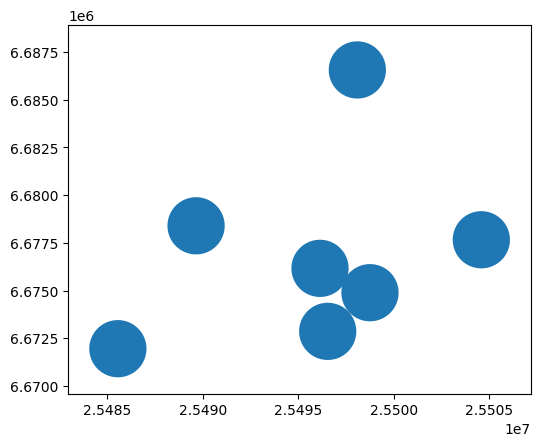

In [14]:
shopping_centre_buffers.plot()

In [15]:
print(shopping_centre_buffers.crs)

EPSG:3879


In [6]:
!pip install certifi
import certifi

In [8]:
import ssl

ssl._create_default_https_context = ssl._create_stdlib_context

In [9]:
# ADD YOUR OWN CODE HERE
ca_bundle = certifi.where()

population_grid = geopandas.read_file(
    (
        "https://kartta.hsy.fi/geoserver/wfs"
        "?service=wfs"
        "&version=2.0.0"
        "&request=GetFeature"
        "&typeName=asuminen_ja_maankaytto:Vaestotietoruudukko_2020"
        "&srsName=EPSG:3879"
    ),
    ca_bundle=ca_bundle,
)
population_grid.crs = "EPSG:3879"

ERROR:fiona._env:SSL certificate problem: unable to get local issuer certificate


In [11]:
population_grid.head()

,gml_id,index,asukkaita,asvaljyys,ika0_9,ika10_19,ika20_29,ika30_39,ika40_49,ika50_59,ika60_69,ika70_79,ika_yli80,geometry
0,Vaestotietoruudukko_2020.1,703,5,51,99,99,99,99,99,99,99,99,99,"POLYGON ((25472499.995 6685998.998, 25472499.9..."
1,Vaestotietoruudukko_2020.2,710,8,44,99,99,99,99,99,99,99,99,99,"POLYGON ((25472499.995 6684249.004, 25472499.9..."
2,Vaestotietoruudukko_2020.3,711,5,90,99,99,99,99,99,99,99,99,99,"POLYGON ((25472499.995 6683999.005, 25472499.9..."
3,Vaestotietoruudukko_2020.4,715,13,34,99,99,99,99,99,99,99,99,99,"POLYGON ((25472499.995 6682998.998, 25472499.9..."
4,Vaestotietoruudukko_2020.5,848,5,53,99,99,99,99,99,99,99,99,99,"POLYGON ((25472749.993 6690249.003, 25472749.9..."


In [23]:
population_grid = population_grid['asukkaita', 'geometry']

KeyError: 'key of type tuple not found and not a MultiIndex'

<Axes: >

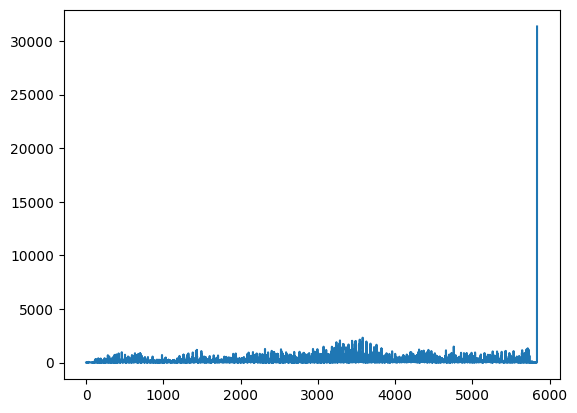

In [22]:
population_grid.plot()

In [10]:
# NON-EDITABLE CODE CELL FOR TESTING YOUR SOLUTION
import geopandas
import pyproj

assert isinstance(population_grid, geopandas.GeoDataFrame)
assert population_grid.crs == pyproj.CRS("EPSG:3879")



Load the buffers computed in *problem 2* into a `GeoDataFrame` called `shopping_centre_buffers`. Add an `assert` statement to check whether the two data frames are in the same CRS.

In [16]:
# ADD YOUR OWN CODE HERE
shopping_centre_buffers.head()

,geometry
0,"POLYGON ((25506098.602 6677662.109, 25506091.3..."
1,"POLYGON ((25498049.312 6672862.540, 25498042.0..."
2,"POLYGON ((25487054.265 6671954.969, 25487047.0..."
3,"POLYGON ((25491151.383 6678394.318, 25491144.1..."
4,"POLYGON ((25499601.692 6686561.206, 25499594.4..."


In [17]:
# NON-EDITABLE CODE CELL FOR TESTING YOUR SOLUTION
assert isinstance(shopping_centre_buffers, geopandas.GeoDataFrame)
assert shopping_centre_buffers.geometry.geom_type.unique() == ["Polygon"]
assert shopping_centre_buffers.crs == pyproj.CRS("EPSG:3879")


---

### b) Carry out a *spatial join* between the `population_grid` and the `shopping_centre_buffers`  (2 points)

Join the shopping centre’s `id` column (and others, if you want) to the population grid data frame, for all population grid cells that are **within** the buffer area of each shopping centre. [Use a *join-type* that retains only rows from both input data frames for which the geometric predicate is true](https://geopandas.org/en/stable/gallery/spatial_joins.html#Types-of-spatial-joins).


In [20]:
# ADD YOUR OWN CODE HERE
addresses_with_population_data = shopping_centre_buffers.sjoin(
    population_grid,
    how="right",
    predicate="within"
)
addresses_with_population_data.head()

,index_left,gml_id,index,asukkaita,asvaljyys,ika0_9,ika10_19,ika20_29,ika30_39,ika40_49,ika50_59,ika60_69,ika70_79,ika_yli80,geometry
0,NaN,Vaestotietoruudukko_2020.1,703,5,51,99,99,99,99,99,99,99,99,99,"POLYGON ((25472499.995 6685998.998, 25472499.9..."
1,NaN,Vaestotietoruudukko_2020.2,710,8,44,99,99,99,99,99,99,99,99,99,"POLYGON ((25472499.995 6684249.004, 25472499.9..."
2,NaN,Vaestotietoruudukko_2020.3,711,5,90,99,99,99,99,99,99,99,99,99,"POLYGON ((25472499.995 6683999.005, 25472499.9..."
3,NaN,Vaestotietoruudukko_2020.4,715,13,34,99,99,99,99,99,99,99,99,99,"POLYGON ((25472499.995 6682998.998, 25472499.9..."
4,NaN,Vaestotietoruudukko_2020.5,848,5,53,99,99,99,99,99,99,99,99,99,"POLYGON ((25472749.993 6690249.003, 25472749.9..."



---

### c) Compute the population sum around shopping centres (2 points)

Group the resulting (joint) data frame by shopping centre (`id` or `name`), and calculate the `sum()` of the population living inside the 1.5 km radius around them.

Print the results, for instance, in the form "12345 people live within 1.5 km from REDI".

In [ ]:
# ADD YOUR OWN CODE HERE



---

### d) Reflection

Good job! You are almost done with this week’s exercise. Please quickly answer the following short questions:
    
- How challenging did you find problems 1-3 (on scale to 1-5), and why?
- What was easy?
- What was difficult?

Add your answers in a new *Markdown* cell below: